<a href="https://colab.research.google.com/github/zhangou888/NN/blob/main/Random_Forest_vs_xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install xgboost
!pip install scikit-learn
!pip install pandas
!pip install numpy
!pip install matplotlib

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# load data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# output
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

Random Forest Accuracy: 1.0
XGBoost Accuracy: 1.0


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:12:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## Example 2

## 1st Random Forest

In [4]:
# Re-import required packages after code state reset
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [5]:
# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target
labels = iris.target_names

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [7]:
# Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:42:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [11]:
# Accuracy scores
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print("Random Forest Accuracy:", acc_rf)
print("XGBoost Accuracy:", acc_xgb)

Random Forest Accuracy: 1.0
XGBoost Accuracy: 1.0


In [9]:
# Classification reports
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)

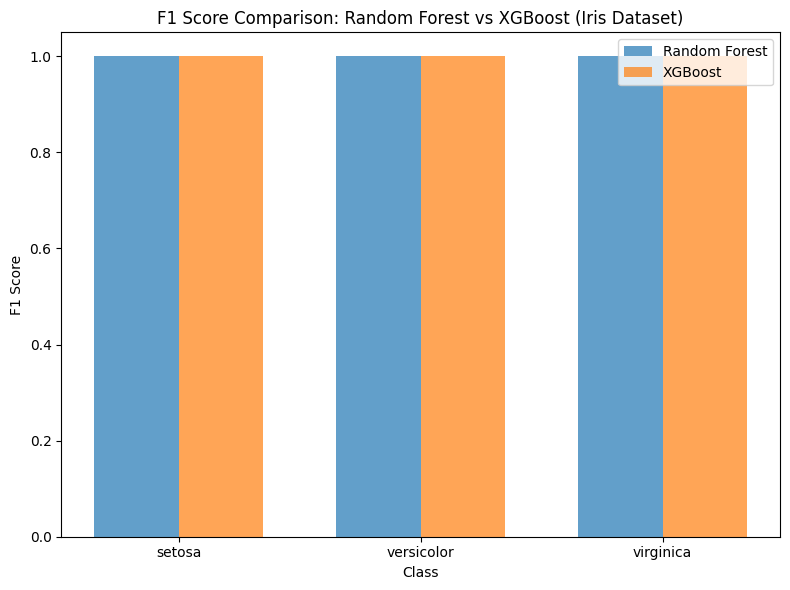

In [10]:
# Extract f1 scores for plotting
rf_f1_scores = [report_rf[str(i)]['f1-score'] for i in range(3)]
xgb_f1_scores = [report_xgb[str(i)]['f1-score'] for i in range(3)]

# Plot F1 Score Comparison
x = range(len(labels))
width = 0.35
plt.figure(figsize=(8, 6))
plt.bar(x, rf_f1_scores, width=width, label='Random Forest', alpha=0.7)
plt.bar([p + width for p in x], xgb_f1_scores, width=width, label='XGBoost', alpha=0.7)
plt.xlabel("Class")
plt.ylabel("F1 Score")
plt.title("F1 Score Comparison: Random Forest vs XGBoost (Iris Dataset)")
plt.xticks([p + width / 2 for p in x], labels)
plt.legend()
plt.tight_layout()
plt.show()
